# Maximum Flow Problem

La capacidad vehicular se medirá mediante un relación inversa del tiempo de viaje. Se asume que mientras más tiempo de viaje, más congestión vehicular y menor capacidad.

$capacidad = \frac{1}{t}$

In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox

## Grafo de tiempo

In [2]:
time_data = pd.read_csv('time_matrix.csv')

In [3]:
time_matrix = time_data.iloc[:,1:].values

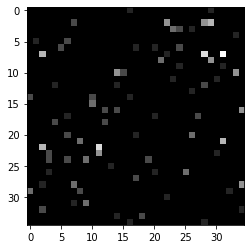

In [4]:
plt.imshow(time_matrix,'gray')

In [5]:
time_graph = nx.DiGraph(time_matrix)

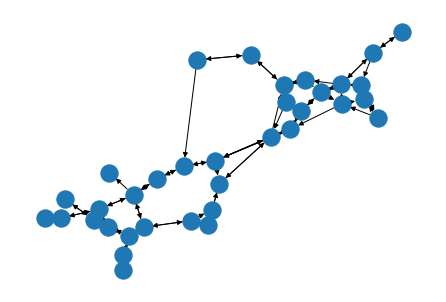

In [6]:
nx.draw_kamada_kawai(time_graph)

In [7]:
time_graph.edges[(0,16)]

{'weight': 1.0}

## Grafo de capacidad

In [8]:
data_point = pd.read_csv('centros_googleApi')

In [9]:
centros = list(data_point['cluster_point'])

In [10]:
graph = nx.DiGraph()
pos_graph = []
lab_dict = {}
for i,centro in enumerate(centros):
    graph.add_node(i)
    lab_dict[i] = str(i)
    pos = centro.replace('(','').replace(')','').split(',')
    x = float(pos[0])
    y = float(pos[1])
    pos_graph.append((x,y))
    graph.nodes[i]['x'] = x
    graph.nodes[i]['y'] = y

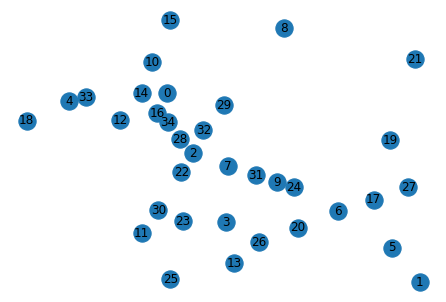

In [11]:
nx.draw(graph,pos_graph,labels=lab_dict,
       with_labels=True)

In [27]:
for edge in time_graph.edges:
    capacity = round(1/time_graph.edges[edge]['weight'],2) #uno sobre tiempo
    graph.add_edge(edge[0],edge[1],capacity=capacity)

In [28]:
graph.edges[(15,10)]

{'capacity': 0.33}

In [29]:
time_graph.edges[(15,10)]

{'weight': 3.0}

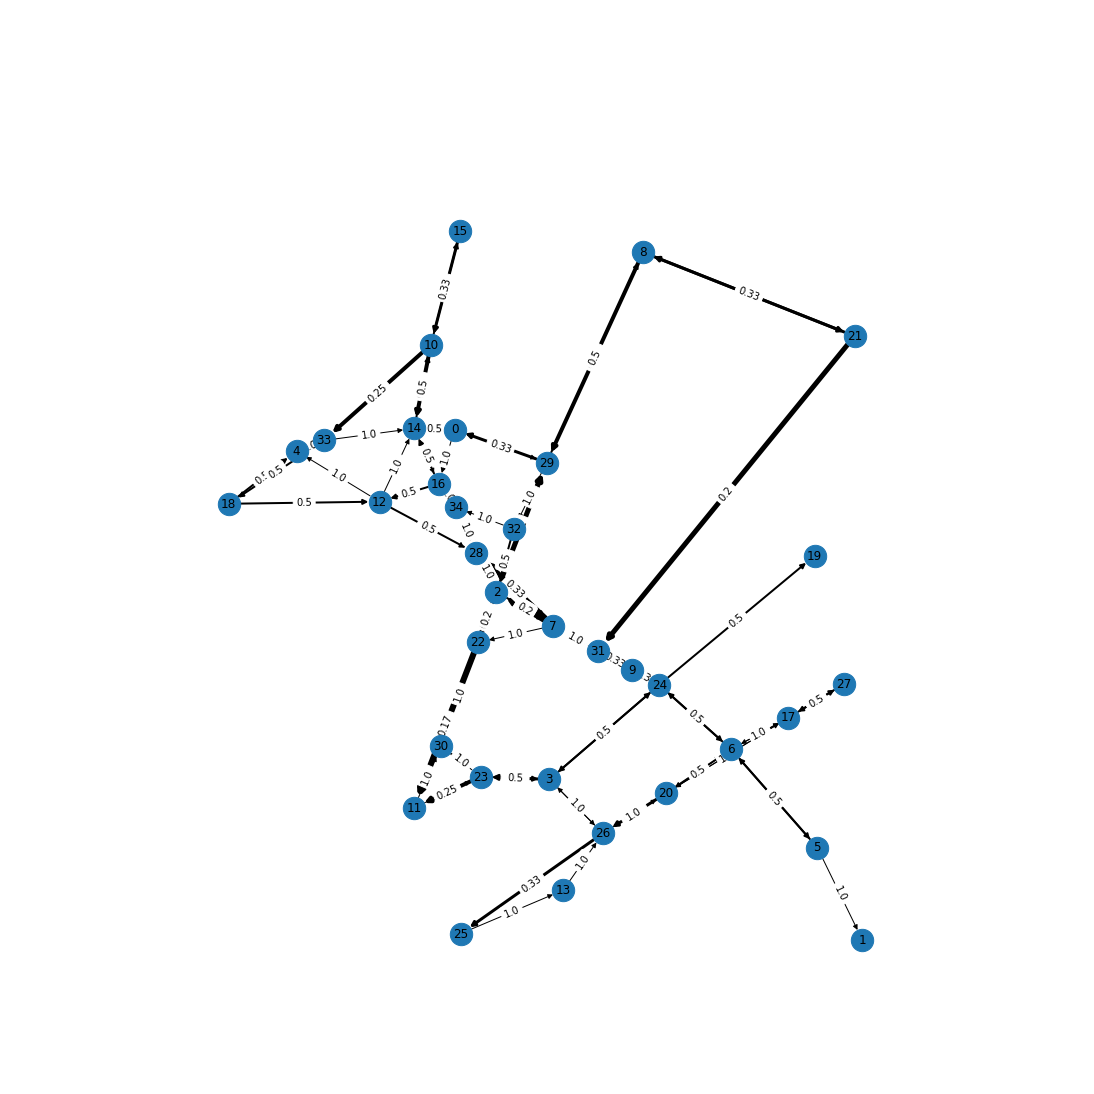

In [30]:
plt.figure(figsize=(15,15))
dis_dic = nx.get_edge_attributes(graph,'capacity')
edges = time_graph.edges()
weights = [time_graph[u][v]['weight'] for u,v in edges]

nx.draw(graph,pos_graph,
            node_size=500,
            labels=lab_dict, 
            with_labels = True,
            width=weights)

nx.draw_networkx_edge_labels(graph,pos_graph,edge_labels=dis_dic)

plt.show()

In [54]:
solucion = nx.maximum_flow(graph,15,11)

In [55]:
solucion[1]

{0: {16: 0.14, 29: 0.10999999999999999},
 1: {},
 2: {7: 0.18, 22: 0.15000000000000002, 28: 0, 29: 0},
 3: {23: 0.16, 24: 0, 26: 0},
 4: {33: 0},
 5: {1: 0, 6: 0},
 6: {5: 0, 17: 0, 20: 0, 24: 0},
 7: {2: 0, 22: 0.01999999999999999, 28: 0.01999999999999999, 31: 0.14},
 8: {21: 0.01999999999999999, 29: 0},
 9: {24: 0.16, 31: 0},
 10: {14: 0.25, 15: 0, 33: 0.08000000000000002},
 11: {23: 0, 30: 0},
 12: {4: 0, 14: 0, 28: 0.24000000000000002},
 13: {26: 0},
 14: {0: 0.25, 10: 0, 16: 0},
 15: {10: 0.33},
 16: {12: 0.16, 14: 0, 34: 0},
 17: {6: 0, 20: 0, 27: 0},
 18: {4: 0, 12: 0.08000000000000002},
 19: {},
 20: {6: 0, 17: 0, 26: 0},
 21: {8: 0, 31: 0.01999999999999999},
 22: {2: 0, 11: 0.17},
 23: {3: 0, 11: 0.16, 30: 0},
 24: {3: 0.16, 6: 0, 9: 0, 19: 0},
 25: {13: 0},
 26: {3: 0, 20: 0, 25: 0},
 27: {17: 0},
 28: {2: 0.24000000000000002, 7: 0, 34: 0.01999999999999999},
 29: {0: 0, 8: 0.01999999999999999, 32: 0.09},
 30: {22: 0},
 31: {7: 0, 9: 0.16},
 32: {2: 0.09, 34: 0},
 33: {14: 0, 

In [61]:
graph_sol = nx.DiGraph(solucion[1])

In [62]:
remove_edges = []
good_nodes = []
for edge in graph_sol.edges:
    capacity = solucion[1][edge[0]][edge[1]]
    if(capacity!=0):
        good_nodes.append(edge[1])
        graph_sol.edges[edge]['capacity'] = round(capacity,3)
    else:
        remove_edges.append(edge)


In [63]:
for edge in remove_edges:
    graph_sol.remove_edge(edge[0],edge[1])

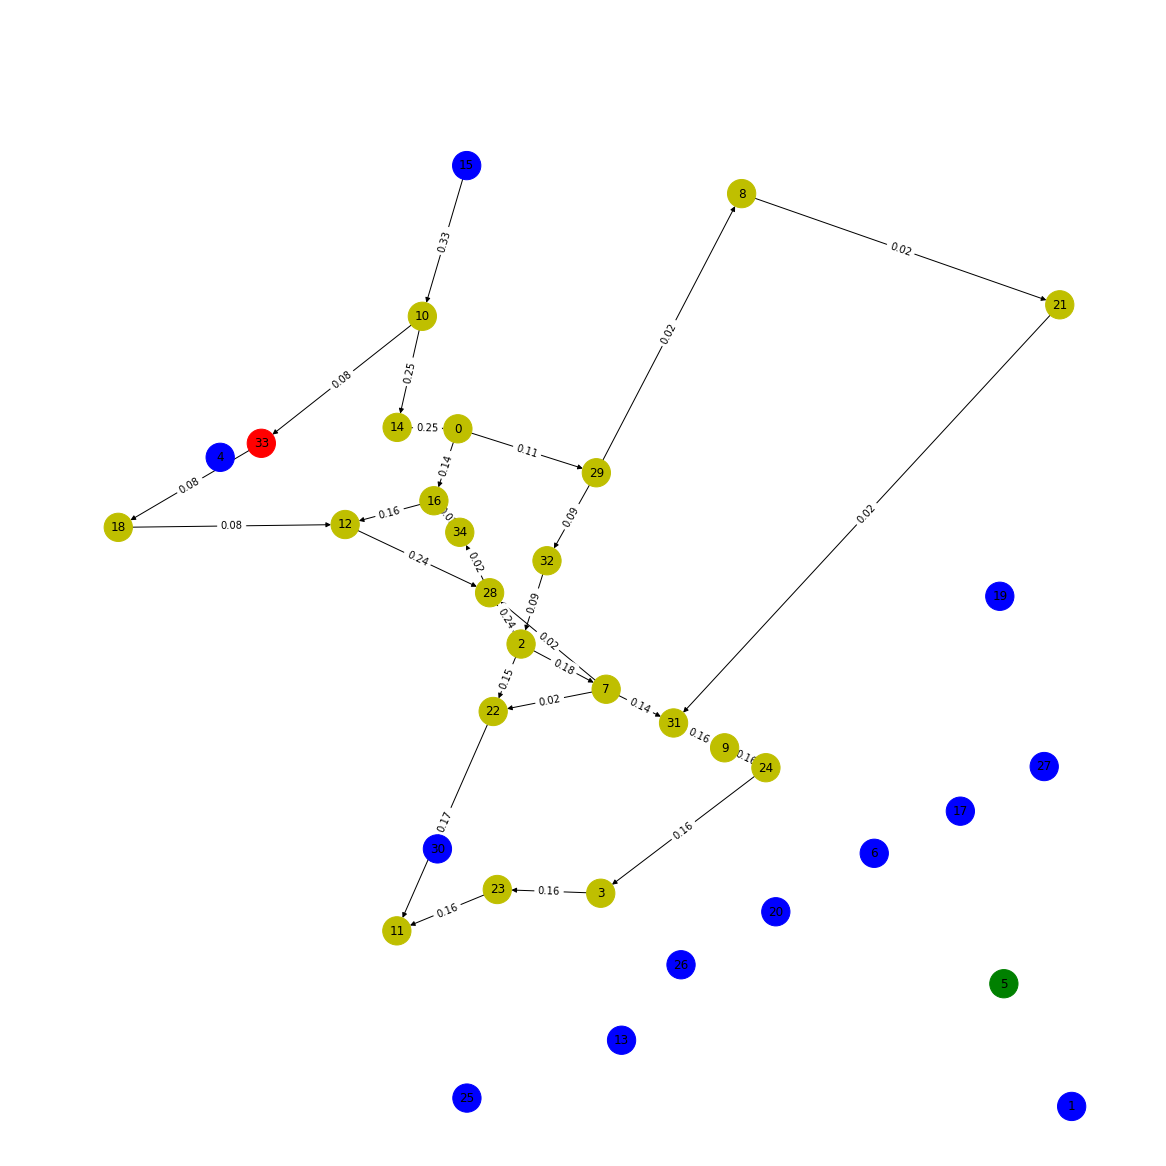

In [64]:
plt.figure(figsize=(16,16))
capacity_dic = nx.get_edge_attributes(graph_sol,'capacity')
colors = ['b']*35
for node in good_nodes:
    colors[node] = 'y'
colors[5] = 'g'
colors[33] = 'r'


nx.draw(graph_sol,pos_graph,
            node_size=800,
            labels=lab_dict, 
            with_labels = True,
            node_color = colors)

nx.draw_networkx_edge_labels(graph_sol,pos_graph,edge_labels=capacity_dic)

plt.show()

In [37]:
solucion[0]

0.45

In [77]:
1/0.45

2.2222222222222223

In [78]:
len(graph.edges)

79

In [34]:
import igraph as ig
g = ig.Graph.from_networkx(graph)

In [121]:
nodos = g.maxflow(11,15)
nodos

Flow(<igraph.Graph object at 0x000001BB5E1C4130>, 1.0, [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [25], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

In [119]:
graph.edges[(15,10)]

{'capacity': 0.3333333333333333}

In [130]:
nodos.value

1.0

In [131]:
g

In [135]:
g.get_edge_dataframe()

,source,target,capacity
edge ID,,,
0,0,16,1.00
1,0,29,1.00
2,2,7,0.50
3,2,22,0.25
4,2,28,0.25
...,...,...,...
74,32,34,1.00
75,33,14,1.00
76,33,18,0.50


In [76]:
len(nodos.flow)

79

In [122]:
flujo = np.array(nodos.flow) 

In [123]:
edges_flujo = np.where(flujo==1)[0]

In [124]:
edges_flujo

array([ 0,  5,  7, 17, 18, 23, 25, 27, 31, 34, 37, 38, 50, 52, 57, 65, 66,
       67, 71, 77], dtype=int64)

In [125]:
graph_i = nodos.graph

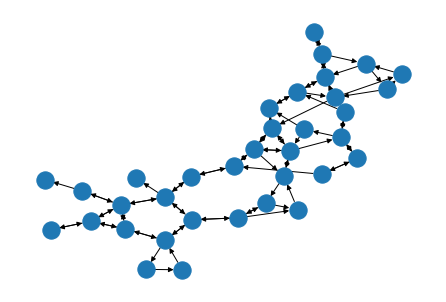

In [126]:
G = graph_i.to_networkx()
nx.draw_kamada_kawai(G)

In [127]:
edges = list(G.edges)

In [128]:
for idx in range(len(edges)):
    if idx not in edges_flujo:
        G.remove_edge(edges[idx][0],edges[idx][1])

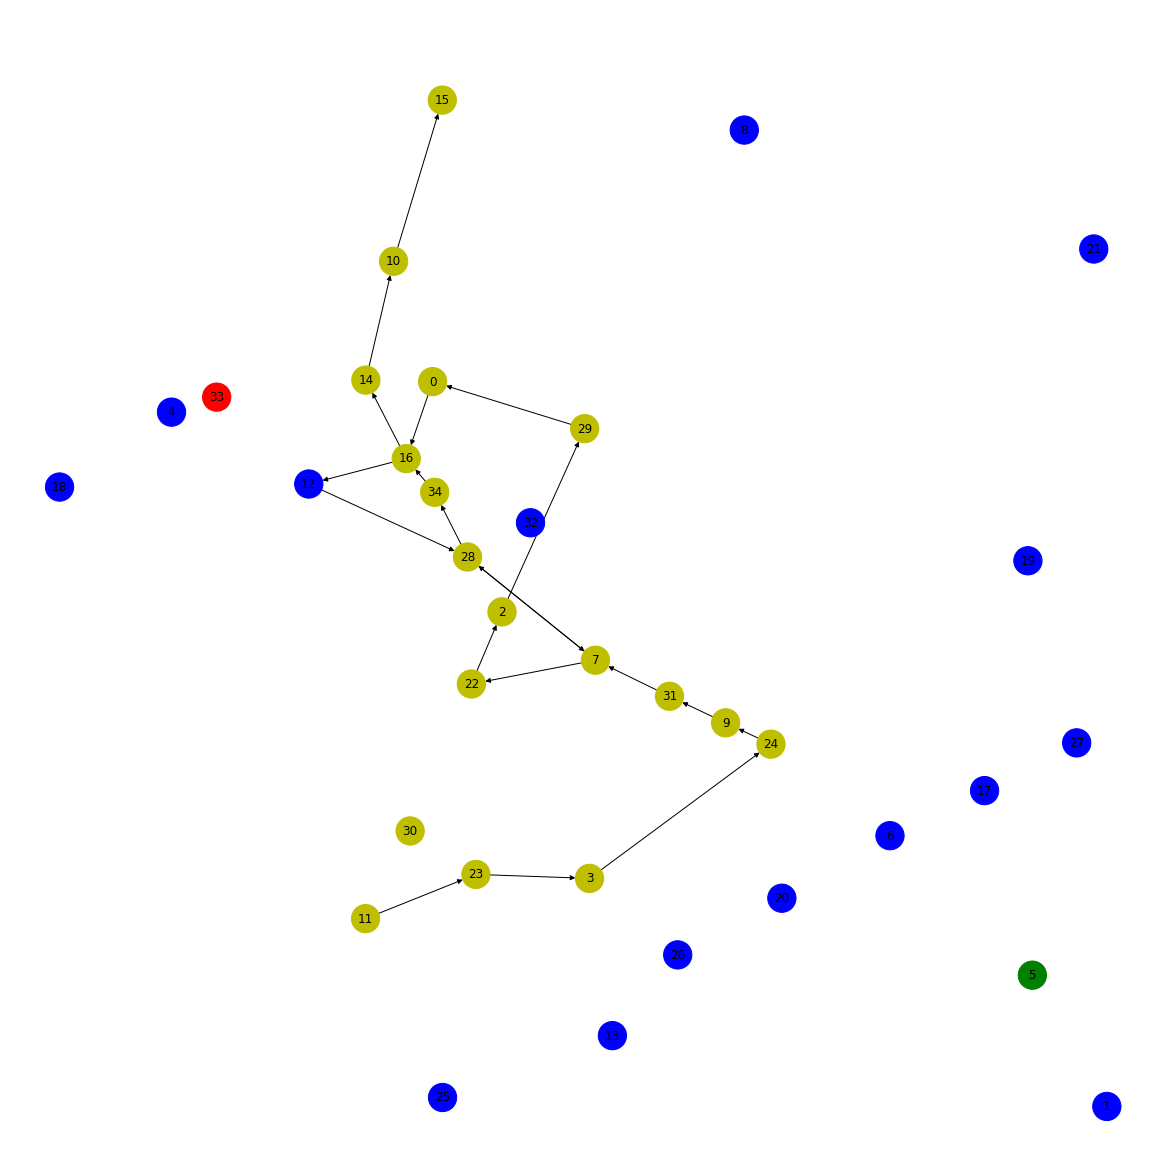

In [147]:
plt.figure(figsize=(16,16))
capacity_dic = nx.get_edge_attributes(G,'capacity')
colors = ['b']*35
for node in good_nodes:
    colors[node] = 'y'
colors[5] = 'g'
colors[33] = 'r'


nx.draw(G,pos_graph,
            node_size=800,
            labels=lab_dict, 
            with_labels = True,
            node_color = colors)

#nx.draw_networkx_edge_labels(G,pos_graph,edge_labels=capacity_dic)

plt.show()